In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
# Load the dataset
file_path = 'refined_social_media_data.csv'  # Path to the refined dataset
data = pd.read_csv(file_path)

# Step 1: Strip spaces from column names and remove unnecessary columns
data.columns = data.columns.str.strip()
if 'Unnamed: 6' in data.columns:
    data.drop(columns=['Unnamed: 6'], inplace=True)

# Step 2: Inspect missing and invalid values
print("\nInitial Dataset Shape:", data.shape)
print("\nMissing values per column (before handling):")
print(data.isnull().sum())

# Step 3: Handle missing values
data.replace("", pd.NA, inplace=True)  # Replace empty strings with NaN
data.fillna("Unknown", inplace=True)  # Replace all NaN values with 'Unknown'
print("Final unique values in 'emotional response' before cleaning:", data['emotional response'].unique())
data['emotional response'] = data['emotional response'].replace({'yes': 'YES', 'No': 'NO'})
data['Age'] = data['Age'].replace({'18-Nov': '11-18'})
data['Age'] = data['Age'].replace({'34-55': '34-54'})

print("Final unique values in 'emotional response' after cleaning:", data['emotional response'].unique())


# Step 5: Label encode categorical variables (except target)




Initial Dataset Shape: (954, 14)

Missing values per column (before handling):
Age                            0
Gender                         0
Occupation                     0
type of content                0
hours                          0
platform                       0
impact on sleep                0
FOMO (fear of missing out)     0
cyberbullying                  0
social comparison              0
addiction rate                 0
no of platforms               48
social life enhancement        0
emotional response             0
dtype: int64
Final unique values in 'emotional response' before cleaning: ['YES' 'NO' 'yes' 'No']
Final unique values in 'emotional response' after cleaning: ['YES' 'NO']


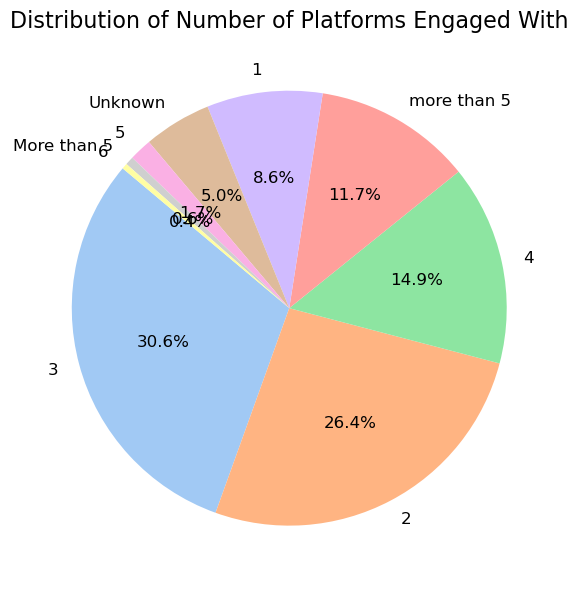

In [21]:
# Enhanced Pie Chart for "Number of Platforms Engaged With"
platform_counts = data['no of platforms'].value_counts()

plt.figure(figsize=(6, 6))
platform_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel'),
    textprops={'fontsize': 12}  # Increase text size
)
plt.title('Distribution of Number of Platforms Engaged With', fontsize=16)
plt.ylabel('')  # Remove default y-axis label
plt.tight_layout()
plt.show()

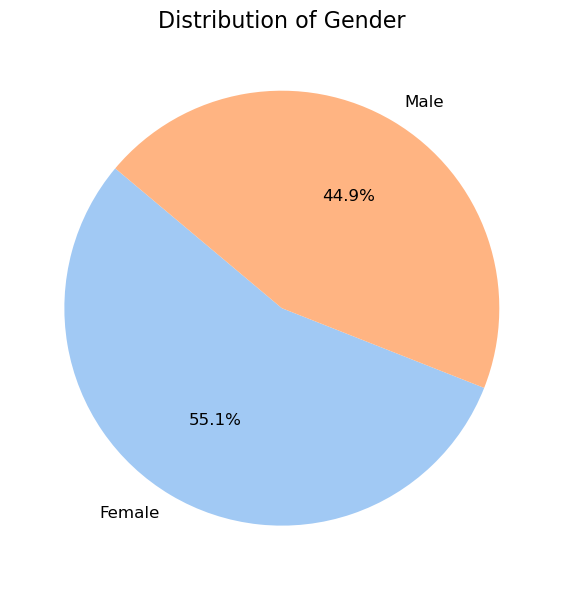

In [19]:
# Pie Chart for Gender
gender_counts = data['Gender'].value_counts()

plt.figure(figsize=(6, 6))
gender_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel'),
    textprops={'fontsize': 12}
)
plt.title('Distribution of Gender', fontsize=16)
plt.ylabel('')  # Remove default y-axis label
plt.tight_layout()
plt.show()


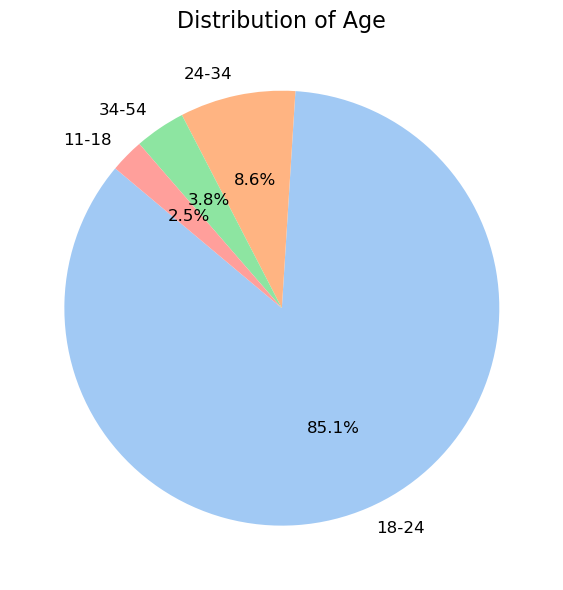

In [41]:
# Pie Chart for Type of Content
content_counts = data['Age'].value_counts()

plt.figure(figsize=(6, 6))
content_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel'),
    textprops={'fontsize': 12}
)
plt.title('Distribution of Age', fontsize=16)
plt.ylabel('')  # Remove default y-axis label
plt.tight_layout()
plt.show()


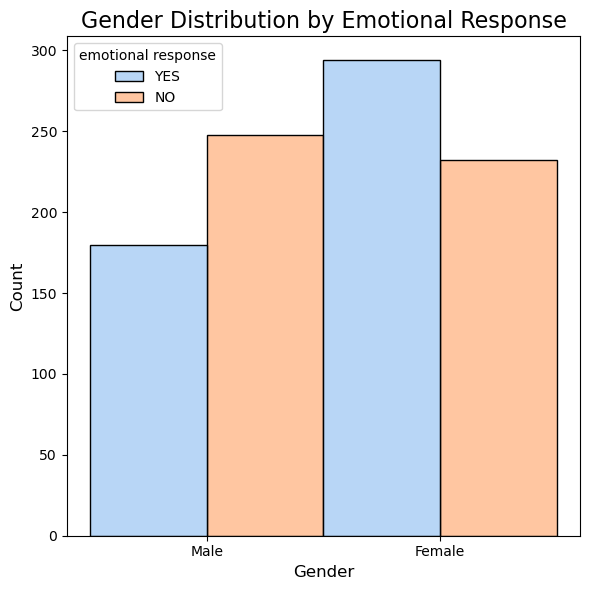

In [43]:
plt.figure(figsize=(6, 6))
sns.histplot(data=data, x='Gender', hue='emotional response', multiple='dodge', kde=False, palette='pastel')
plt.title('Gender Distribution by Emotional Response', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


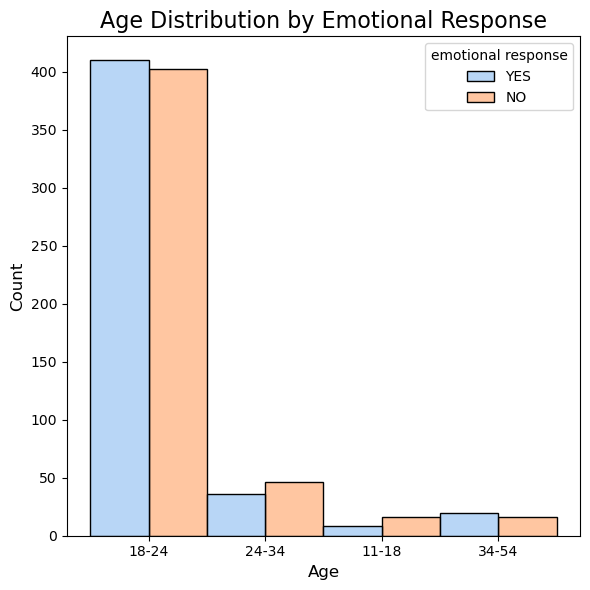

In [45]:
plt.figure(figsize=(6, 6))
sns.histplot(data=data, x='Age', hue='emotional response', multiple='dodge', kde=False, palette='pastel')
plt.title('Age Distribution by Emotional Response', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

